In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

In [3]:
var = None 

In [7]:
# Initialisation des grandeurs numériques
D = 1
Temps = 0.3
NTemps = 4000
dt = Temps/NTemps
t=np.linspace(0,Temps, NTemps)
L = 10
#L=4 # pour tester les problèmes de stabilité
NX=400
dx = L/(NX-1)
x = np.linspace(-400, 400, NX)

In [7]:
print(dt)
print(dx**2/(2*D))

7.5e-05
0.00031406837896746876


In [8]:
xlim=5
T = 0.5*D*(erf(xlim-x)-erf(-xlim-x))

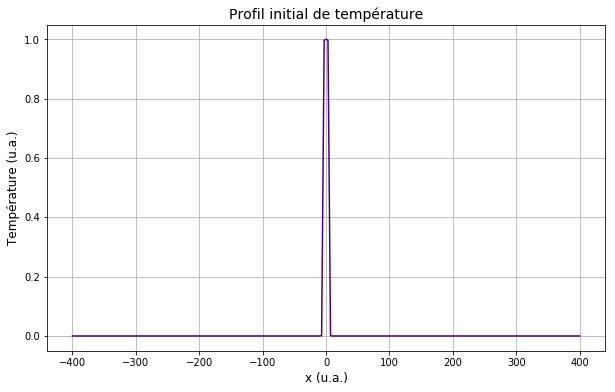

In [9]:
# Représentation du profil initial de température
fig = plt.figure(figsize=(10,6))
plt.plot(x,T, color = 'indigo')
plt.xlabel("x (u.a.)", fontsize = 12)
plt.ylabel("Température (u.a.)", fontsize = 12)
plt.title("Profil initial de température", fontsize = 14)
plt.grid()
plt.savefig("profil-initial-T.png", dpi=300)
plt.show()


In [10]:
# Initialisation des variables pour le calcul
Theta = T[:,np.newaxis]
MD = np.zeros((NX))

In [11]:
# Résolution de l'équation de diffusion
for n in range(0,NTemps) :
    
    MD[1:-1] = dt * D * (T[:-2] - 2 * T[1:-1] + T[2:]) / (dx**2)
    T += MD
    
    Theta = np.concatenate([Theta, T[:,np.newaxis]], axis = 1)

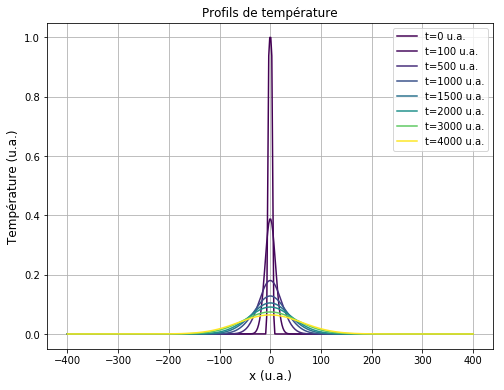

In [12]:
# Représentation de quelques profils de température
fig = plt.figure(figsize=(8,6))
plt.plot(x,Theta[:,0], label="t=0 u.a.", color = plt.get_cmap('viridis')(1/NTemps))
plt.plot(x,Theta[:,100], label="t=100 u.a.", color = plt.get_cmap('viridis')(100/NTemps))
plt.plot(x,Theta[:,500], label="t=500 u.a.", color = plt.get_cmap('viridis')(500/NTemps))
plt.plot(x,Theta[:,1000], label="t=1000 u.a.", color = plt.get_cmap('viridis')(1000/NTemps))
plt.plot(x,Theta[:,1500], label="t=1500 u.a.", color = plt.get_cmap('viridis')(1500/NTemps))
plt.plot(x,Theta[:,2000], label="t=2000 u.a.", color = plt.get_cmap('viridis')(2000/NTemps))
plt.plot(x,Theta[:,3000], label="t=3000 u.a.", color = plt.get_cmap('viridis')(3000/NTemps))
plt.plot(x,Theta[:,4000], label="t=4000 u.a.", color = plt.get_cmap('viridis')(4000/NTemps))
plt.legend(loc="upper right")
plt.xlabel("x (u.a.)", fontsize = 12)
plt.ylabel("Température (u.a.)", fontsize = 12)
plt.title("Profils de température", fontsize = 12)
plt.grid()
plt.savefig("profils-T.png", dpi=300)
plt.show()

In [7]:
# Définition de la fonction de calcul de la largeur à mi-hauteur
def LMH(X,Y):
    half_max = max(Y) / 2.
    # on détermine le signe de half_max -Y pour connaitre la largeur à mi-hauteur
    d = np.sign(half_max - Y)
    k = np.array(np.where(d == -1))
    # la sortie donne la largeur correspondante
    return X[k[0,-1]] - X[k[0,0]] 

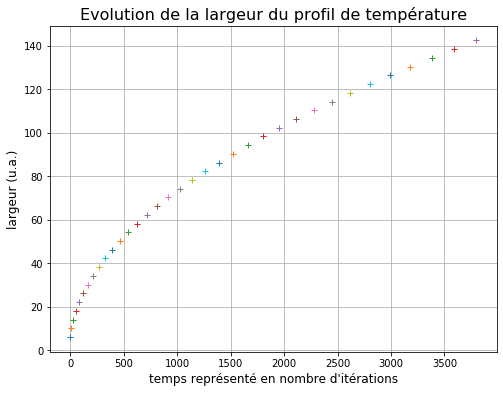

In [10]:
la = np.zeros((NTemps))
t1=np.linspace(0,NTemps-1, NTemps)
fig = plt.figure(figsize=(8,6))

for m in range(0,NTemps) :
    la[m] = LMH(x,Theta[:,m])
    
    if (la [m]!= la[m-1]) :
        plt.plot(t1[m],la[m], '+')
        plt.xlabel("Temps représenté en nombre d'itérations", fontsize=12)
        plt.ylabel("Largeur (u.a.)", fontsize=12)
        plt.title("Evolution de la largeur du profil de température", fontsize=16)
        plt.grid()
         
plt.savefig("Evolution-largeur-iterations.png", dpi=300)
plt.show()  

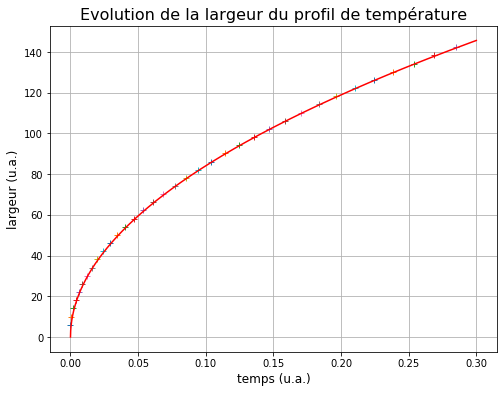

4000
0.3


In [64]:
alpha=266
rac = alpha*np.sqrt(t)
la = np.zeros((NTemps))
NT1=NTemps
m=0
fig = plt.figure(figsize=(8,6))
for m in range(0,NT1) :
    la[m] = LMH(x,Theta[:,m])
    
    if (la [m]!= la[m-1]) :
        plt.plot(t[m],la[m], '+')
        plt.xlabel("Temps (u.a.)", fontsize=12)
        plt.ylabel("Largeur (u.a.)", fontsize=12)
        plt.title("Evolution de la largeur du profil de température", fontsize=16)
        plt.grid()
         
plt.plot(t,rac,'r', label='modèle en racine carrée de t (u.a.)')
plt.savefig("Evolution-largeur-modele-2.png", dpi=300)
plt.show()  
print(NTemps)
print(t[3999])

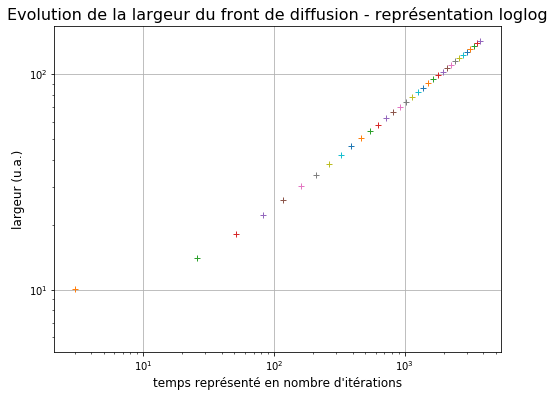

In [13]:
la = np.zeros((NTemps))
fig = plt.figure(figsize=(8,6))

for m in range(0,NTemps) :
    la[m] = LMH(x,Theta[:,m])
    
    if (la [m]!= la[m-1]) :
        plt.plot(t1[m],la[m], '+')

plt.loglog(basex=10, basey=10)
plt.xlabel("Temps représenté en nombre d'itérations", fontsize=12)
plt.ylabel("Largeur (u.a.)", fontsize=12)
plt.title("Evolution de la largeur du front de diffusion - représentation loglog", fontsize=16)
plt.grid()
plt.savefig("Evolution-largeur-loglog-iterations.png", dpi=300)
plt.show()

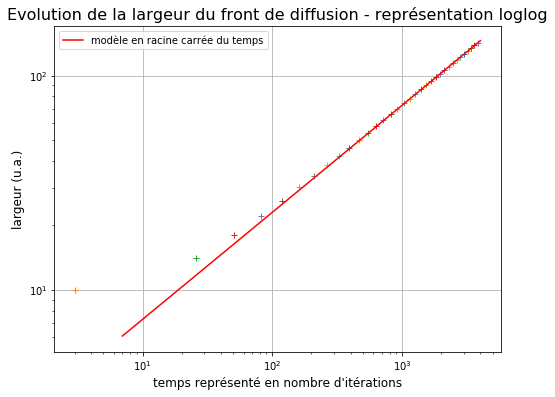

In [16]:
fig = plt.figure(figsize=(8,6))
for m in range(0,NTemps) :
    la[m] = LMH(x,Theta[:,m])
    
    if (la [m]!= la[m-1]) :
        plt.plot(t1[m],la[m], '+')

plt.plot(t1[7:NTemps], rac[7:NTemps],'r', label='modèle en racine carrée du temps')
plt.loglog(basex=10, basey=10)
plt.xlabel("Temps représenté en nombre d'itérations", fontsize=12)
plt.ylabel("Largeur (u.a.)", fontsize=12)
plt.title("Evolution de la largeur du front de diffusion - représentation loglog", fontsize=16)
plt.legend(loc="upper left")
plt.grid()
plt.savefig("Evolution-largeur-modele-loglog-iterations.png", dpi=300)
plt.show()